In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
24,491 cases (7 day average) as of Tue 31 Aug, +779.9 since Mon 30 Aug
765 hospitalised (7 day average) as of Wed 01 Sep, +0.0 since Wed 01 Sep
91 died (7 day average) as of Tue 31 Aug, -0.9 since Mon 30 Aug


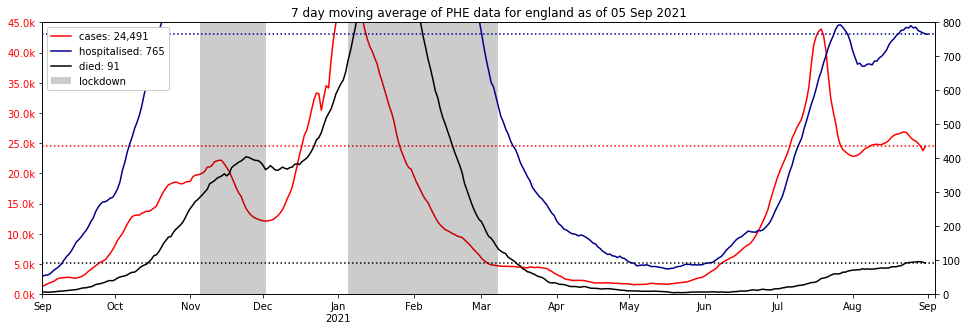

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

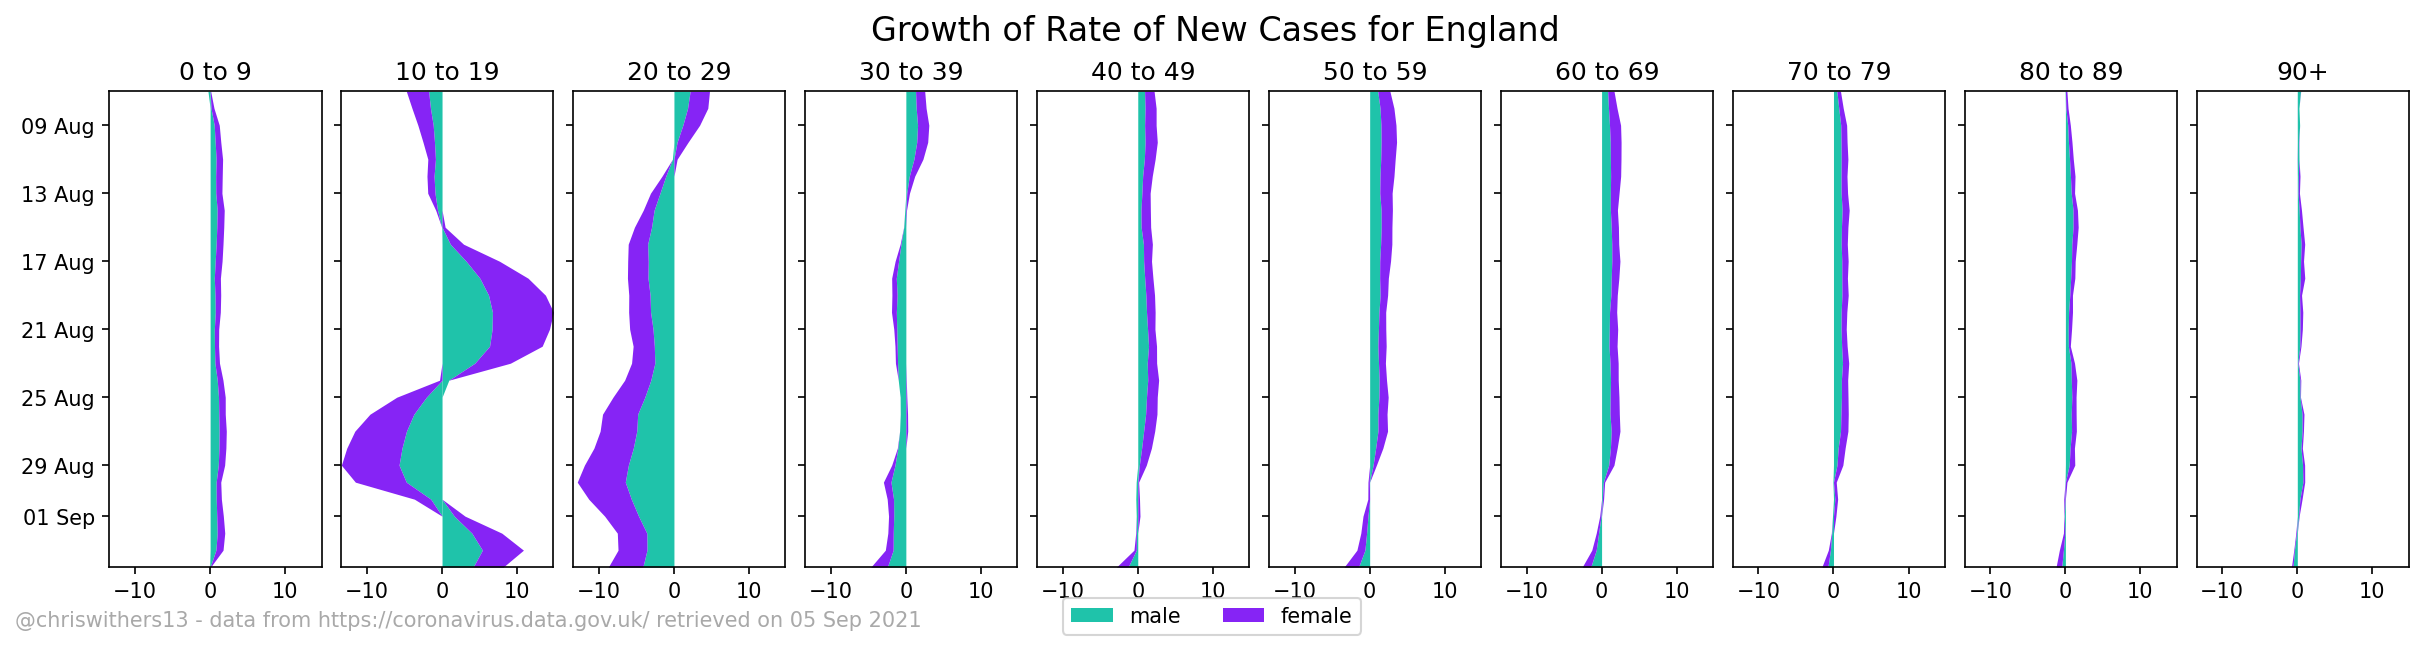

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

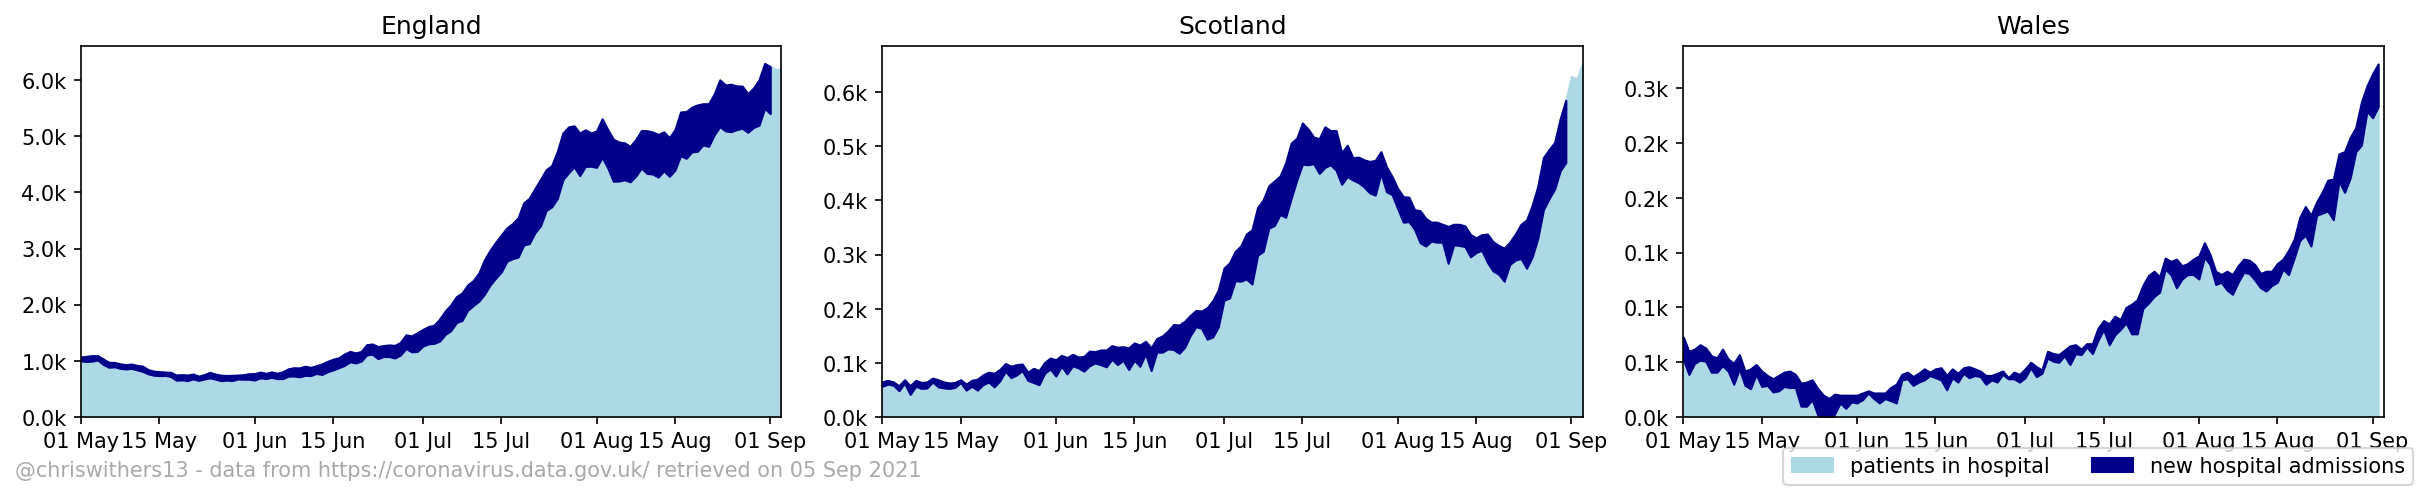

In [5]:
hospital_plot(start='2021-05', figsize=(16,3), figs=(1, 3))

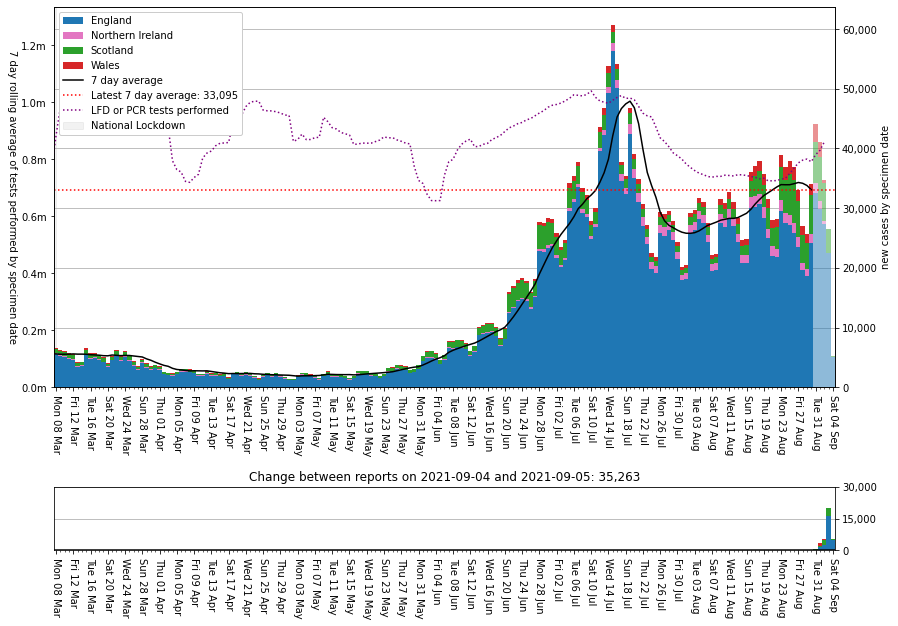

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

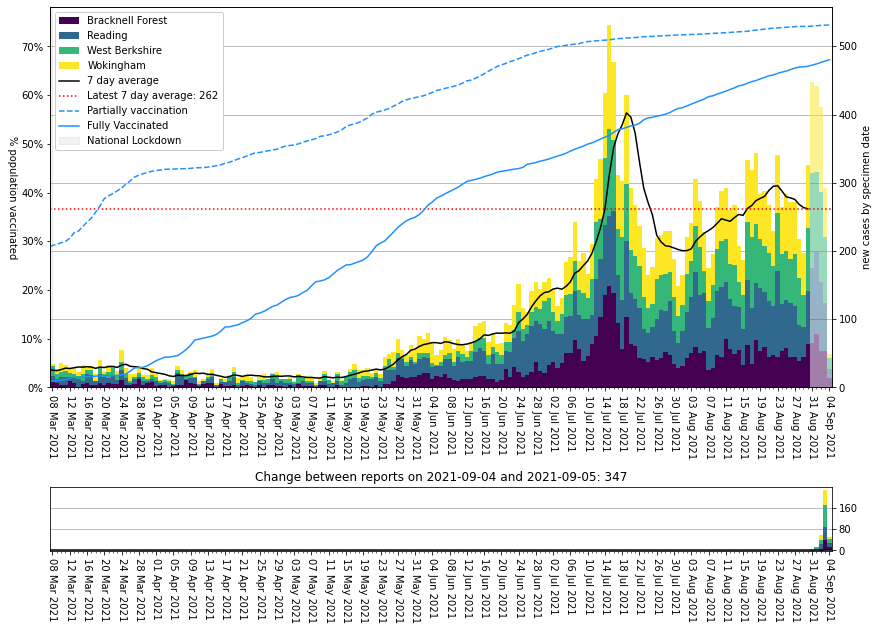

In [7]:
plot_areas(for_date, areas=my_areas, lines=population_vaccinated)

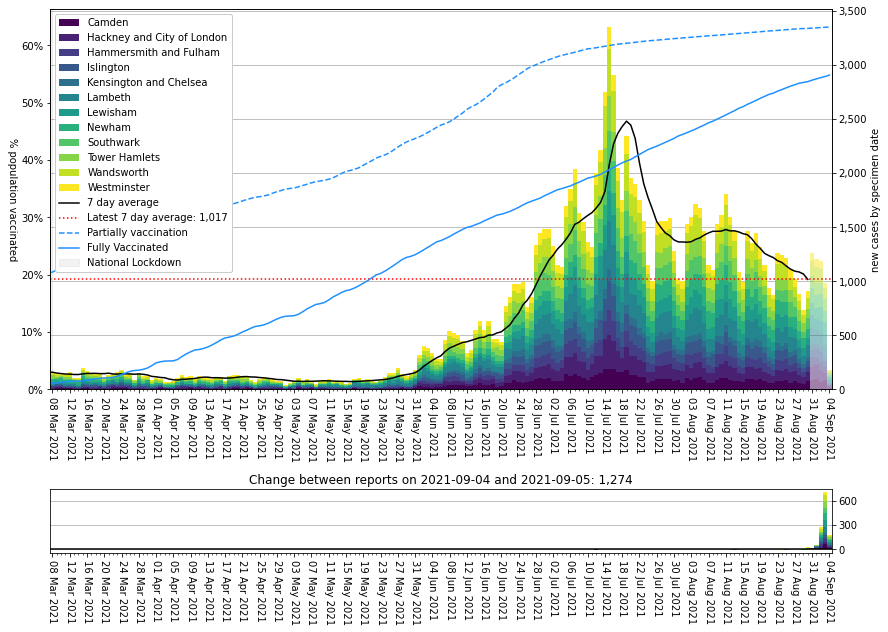

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                     
S12000050    North Lanarkshire         1050.766031                  3587.0   
S12000018           Inverclyde         1020.565553                   794.0   
S12000039  West Dunbartonshire          979.422017                   871.0   
S12000038         Renfrewshire          962.590731                  1724.0   
S12000011    East Renfrewshire          909.661886                   869.0   
S12000049         Glasgow City          839.335355                  5314.0   
S12000029    South Lanarkshire          823.635853                  2640.0   
S12000045  East Dunbartonshire          811.855670                   882.0   
S12000005     Clackmannanshire          781.916958                   403.0   
S12000019           Midlothian          715.985291                   662.0   

          Specimen date  
areaCode                 
S12000050    2021-09-04  
S12000018    2021-09-04  
S12000039    2021-09-04  
S12000038    2021-09-04  
S12000011    2021-09-04  
S12000049    2021-09-04  
S12000029    2021-09-04  
S12000045    2021-09-04  
S12000005    2021-09-04  
S12000019    2021-09-04

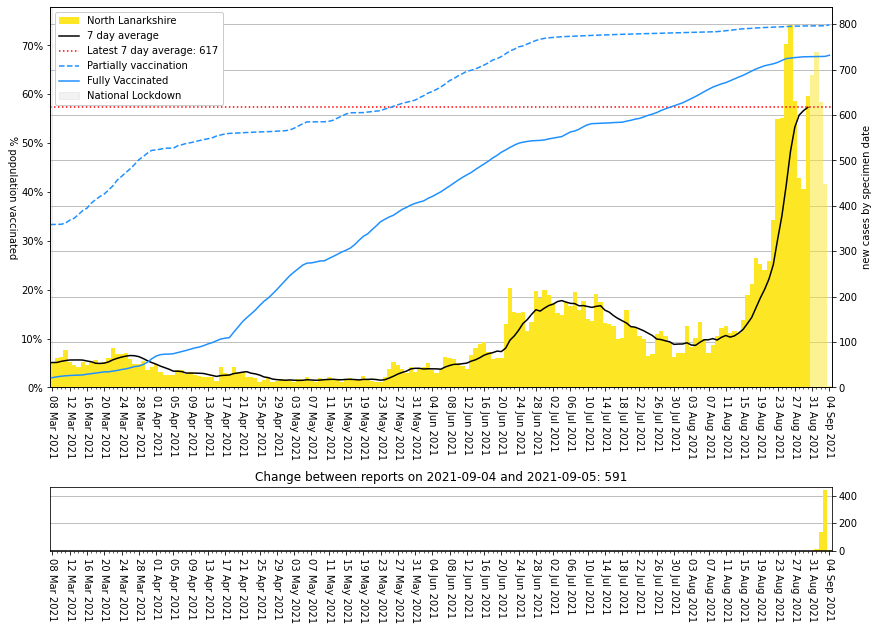

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                      
S12000049                  Glasgow City          839.335355   
S12000050             North Lanarkshire         1050.766031   
S12000036             City of Edinburgh          589.602423   
E08000025                    Birmingham          232.611909   
S12000029             South Lanarkshire          823.635853   
E08000035                         Leeds          303.477701   
S12000047                          Fife          625.886762   
E06000052  Cornwall and Isles of Scilly          351.870053   
E06000047                 County Durham          331.073357   
S12000038                  Renfrewshire          962.590731   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
S12000049                  5314.0    2021-09-04  
S12000050                  3587.0    2021-09-04  
S12000036                  3095.0    2021-09-04  
E08000025                  2656.0    2021-09-04  
S12000029                  2640.0    2021-09-04  
E08000035                  2407.0    2021-09-04  
S12000047                  2338.0    2021-09-04  
E06000052                  2012.0    2021-09-04  
E06000047                  1755.0    2021-09-04  
S12000038                  1724.0    2021-09-04

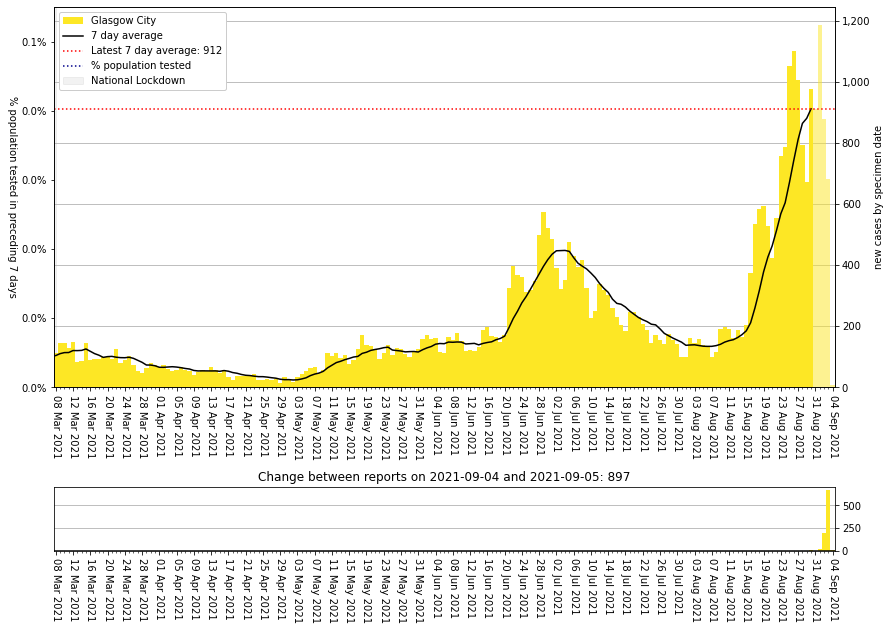

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

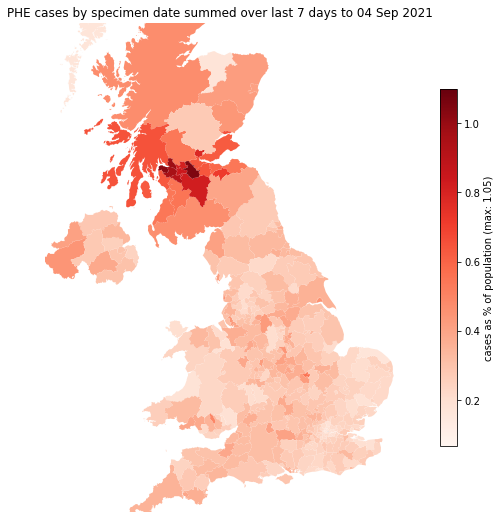

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=1.1)

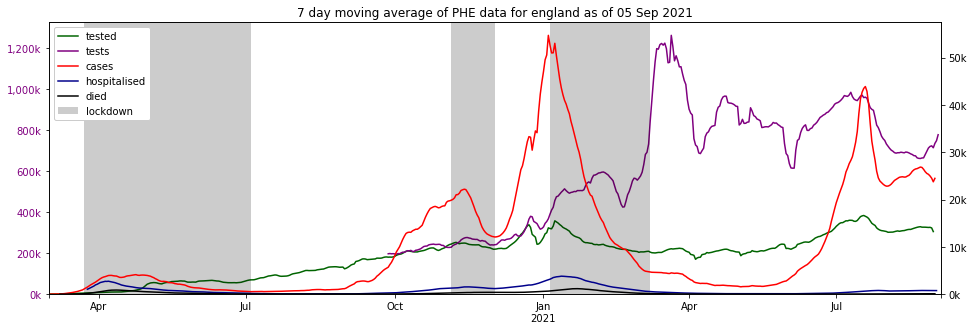

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

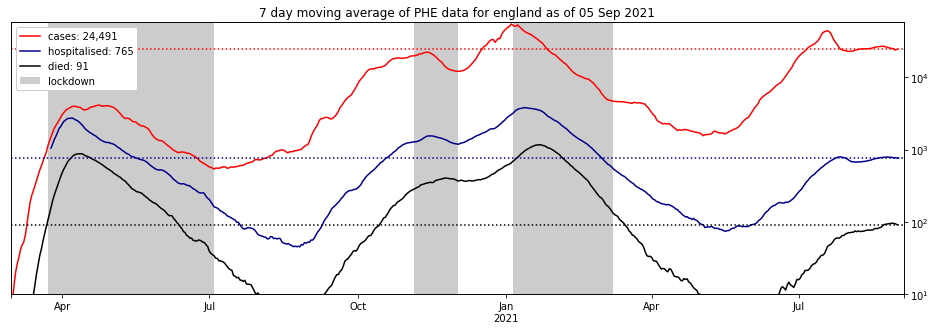

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  36293590.0  40474227.0  4180637.0    56286961   
1  Northern Ireland  N92000002   1171130.0   1291010.0   119880.0     1893667   
2          Scotland  S92000003   3726769.0   4121962.0   395193.0     5463300   
3             Wales  W92000004   2186704.0   2358138.0   171434.0     3152879   

    full_pct  partial_pct   none_pct  
0  64.479569     7.427363  28.093068  
1  61.844559     6.330574  31.824867  
2  68.214614     7.233595  24.551791  
3  69.355786     5.437380  25.206835

'partial: 48,245,337 (72.2%), full: 43,378,193'

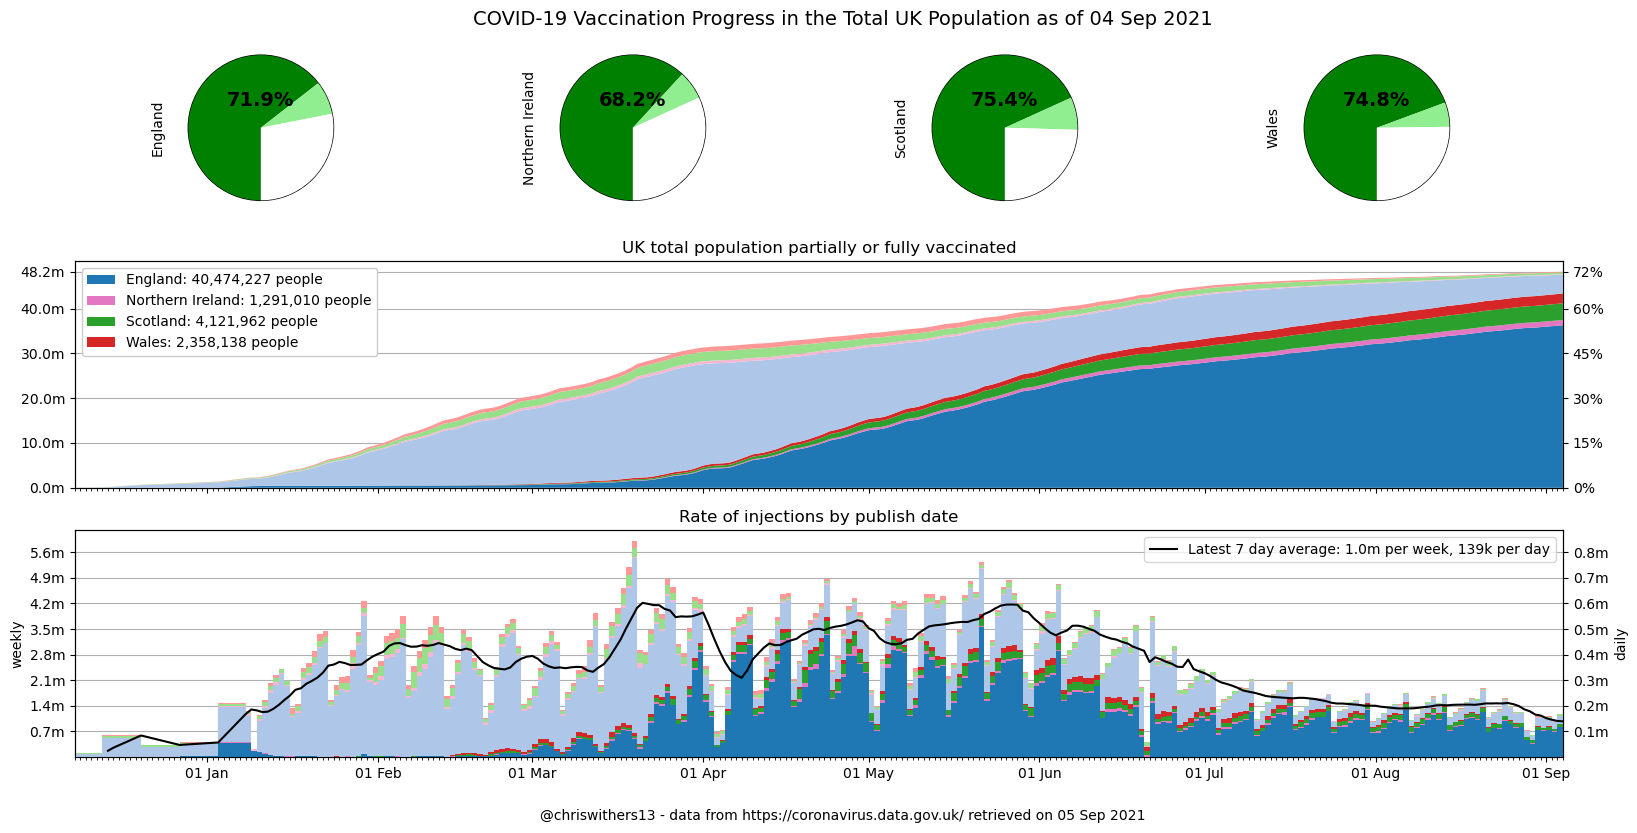

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")